### Halftones

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import cv2 as cv

#### Filters
- Floyd e Steinberg

In [2]:
FLOYD = 1/16 * np.array([
    [0, 0, 7],
    [3, 5, 1]
])

STEVENSON = 1/200 * np.array([
    [0, 0, 0, 0, 0, 32, 0],
    [12, 0, 26, 0, 30, 0, 16],
    [0, 12, 0, 26, 0, 12, 0],
    [5, 0, 12, 0, 12, 0, 5]
])

##### Stipple techniques

In [3]:
def stipple(img, error, zigzag):
    # error distribution size
    eX = error.shape[1] // 2
    eY = error.shape[0] - 1

    # add border and change array type to float
    # f(x,y) image
    img = cv.copyMakeBorder(img,
                            top=0, bottom=eY,
                            left=eX, right=eX,
                            borderType=cv.BORDER_CONSTANT
                            )
    img = img.astype(float, copy=False)

    # size for loop
    dX = img.shape[1] - eX
    dY = img.shape[0] - eY

    # g(x,y) image
    out = np.zeros(img.shape)

    # reverse error
    error_rev = np.fliplr(error)

    for y in range(dY):
        # reverse if is odd
        reverse = (y % 2 == 1) if zigzag else False
        error_curr = error_rev if reverse else error

        for x in range(eX, dX)[::-1 if reverse else 1]:
            out[y, x] = 0 if img[y, x] < 128 else 255

            diff = img[y, x] - out[y, x]
            slice = img[y:y+eY+1, x-eX:x+eX+1]
            slice += (error_curr * diff)

    out = out[:dY, eX:dX]
    return out


##### Halftones with error distribution

In [4]:
def halftones(file, error):
    inp_img = cv.imread(file, cv.IMREAD_GRAYSCALE)
    out_img = stipple(inp_img, error, False)

    return inp_img, out_img

##### Images

In [5]:
input_image_file = './images/baboon.png'
# output_image_file = './images/baboon_gray.png'

##### Execute halftones and plot images

Text(0.5, 1.0, 'Subtraction image')

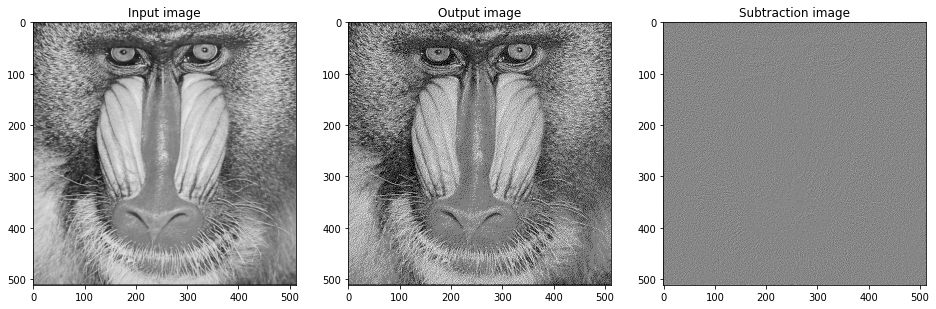

In [6]:
input_image, output_image = halftones(input_image_file, FLOYD)
# cv.imwrite(output_image_file, output_image)

plt.figure(figsize=(16, 10))
rows, cols = 1, 3

# showing image
plt.subplot(rows, cols, 1)
plt.imshow(input_image, cmap='gray')
plt.title("Input image")

plt.subplot(rows, cols, 2)
plt.imshow(output_image, cmap='gray')
plt.title("Output image")

plt.subplot(rows, cols, 3)
plt.imshow(input_image - output_image, cmap='gray')
plt.title("Subtraction image")